In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('dataset_final.csv')
data.head()

,major,web designing,website design project,technologies of client-server,Characteristics of clients and servers,role of middleware,server-side scripting and LSM,design and develop dynamic websites,mobile computer systems,mobile computing devices,...,Sentiment Analysis,Robotics devices and systems,Motion & multiple-robot coordination,effective communication,business communication,Operating and maintaining an outsourced service,Different tools and methodologies used in outsourcing operations,Customer service skills,Analytical skills,system optimization
0,0,2,2,2,2,1,1,2,2,2,...,2,2,2,2,2,2,2,1,1,1
1,1,2,2,2,2,3,2,2,3,2,...,2,2,2,3,2,2,2,3,3,2
2,1,2,1,1,1,1,1,1,2,2,...,1,1,1,2,2,2,1,1,1,1
3,1,2,2,2,2,2,2,2,3,3,...,2,1,1,2,1,2,2,2,2,2
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [3]:
# Display a random sample of 10 observations
data1 = data.sample(10)
data1

,major,web designing,website design project,technologies of client-server,Characteristics of clients and servers,role of middleware,server-side scripting and LSM,design and develop dynamic websites,mobile computer systems,mobile computing devices,...,Sentiment Analysis,Robotics devices and systems,Motion & multiple-robot coordination,effective communication,business communication,Operating and maintaining an outsourced service,Different tools and methodologies used in outsourcing operations,Customer service skills,Analytical skills,system optimization
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
38,2,1,2,1,2,1,1,1,2,1,...,1,1,1,2,1,1,1,2,1,2
50,2,2,2,1,1,2,1,2,2,2,...,1,1,1,2,2,2,2,2,2,2
7,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
137,1,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
16,1,3,3,3,3,3,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
34,0,1,1,1,1,1,1,1,2,2,...,1,1,1,2,2,2,2,2,1,1
37,3,2,2,2,2,2,2,2,2,2,...,2,3,2,2,3,2,2,2,1,1
5,2,3,3,3,3,3,3,3,3,3,...,2,2,1,3,2,3,2,1,2,2
99,1,2,1,2,2,2,2,2,2,2,...,1,1,1,2,2,2,2,2,2,2


In [4]:
major_labels = ['Animation and Motion Design','Web Development', 'Service Managemet Program', 'Intelligent System']

In [6]:
# splitting the features and target variable
data_X = data.drop(columns='major',axis=1)
data_y = data['major']

In [7]:
data_y.value_counts()

1    48
2    43
3    31
0    16
Name: major, dtype: int64

In [8]:
# # Dealing with Imbalanced DataSet
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE(k_neighbors=4)
# # transform the dataset
# data_X, data_y = oversample.fit_resample(data_X, data_y)
# data_y.value_counts()

In [9]:
from sklearn.model_selection import train_test_split

# # Separate features and labels
# data_X, data_y = data[major_features].values, data[major_label].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y,
                                                    test_size=0.20,
                                                    random_state=0,
                                                    stratify=data_y) 

print ('Training Set: %d, Test Set: %d \n' % (X_train.shape[0], X_test.shape[0]))

Training Set: 110, Test Set: 28 



In [10]:
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.1

# train a logistic regression model on the training set
multi_model = LogisticRegression( C=1/reg, solver="liblinear", multi_class='ovr', max_iter=1000).fit(data_X, data_y)
print (multi_model)

LogisticRegression(C=10.0, max_iter=1000, multi_class='ovr', solver='liblinear')


In [11]:
major_predictions = multi_model.predict(X_test)
print('Predicted labels: ', major_predictions[:1])
print('Actual labels   : ' ,y_test[:1])

Predicted labels:  [2]
Actual labels   :  93    2
Name: major, dtype: int64


In [13]:
from sklearn. metrics import classification_report

print(classification_report(y_test, major_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.82      0.90      0.86        10
           2       0.89      0.89      0.89         9
           3       0.80      0.67      0.73         6

    accuracy                           0.86        28
   macro avg       0.88      0.86      0.87        28
weighted avg       0.86      0.86      0.85        28



In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_test, major_predictions))
print("Overall Precision:",precision_score(y_test, major_predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, major_predictions, average='macro'))

Overall Accuracy: 0.8571428571428571
Overall Precision: 0.8767676767676769
Overall Recall: 0.8638888888888888


C:\Users\Ruth\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


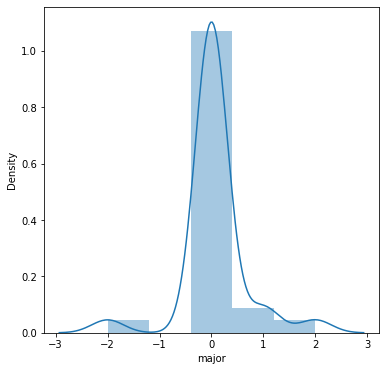

In [15]:
plt.figure(figsize = (6,6))
sns.distplot(y_test-major_predictions)
plt.show()

In [16]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
mcm = confusion_matrix(y_test, major_predictions)
print(mcm)

[[3 0 0 0]
 [0 9 0 1]
 [0 1 8 0]
 [0 1 1 4]]


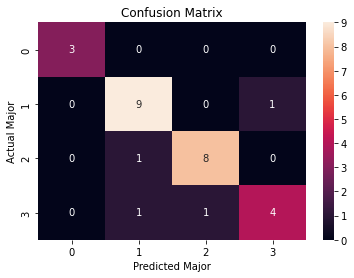

In [17]:
# Plotting the confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_mat =confusion_matrix(y_test, major_predictions)
sns.heatmap(confusion_mat, annot=True)
plt.xlabel('Predicted Major')
plt.ylabel('Actual Major')
plt.title('Confusion Matrix')
plt.show()

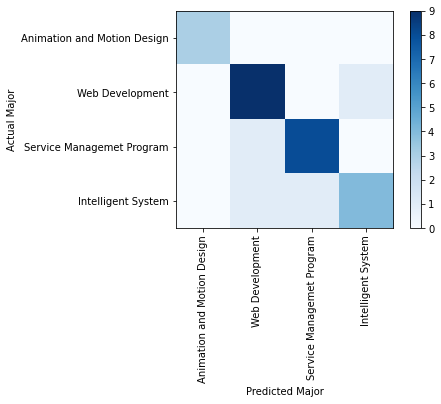

In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

# confusion_mat =confusion_matrix(y_test, major_predictions)
# sns.heatmap(confusion_mat, annot=True)
# plt.xlabel("Predicted Major")
# plt.ylabel("Actual Major")
# plt.show()

plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(major_labels))
plt.xticks(tick_marks, major_labels, rotation=90)
plt.yticks(tick_marks, major_labels)
plt.xlabel("Predicted Major")
plt.ylabel("Actual Major")
plt.show()

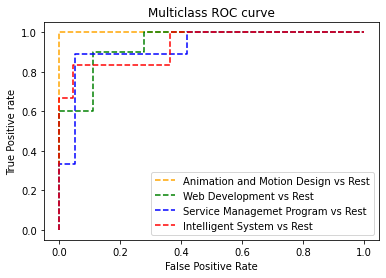

In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Get class probability scores
predict_prob = multi_model.predict_proba(X_test)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(major_labels)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, predict_prob[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=major_labels[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=major_labels[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=major_labels[2] + ' vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label=major_labels[3] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [20]:
auc = roc_auc_score(y_test,predict_prob, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 0.9486709197235512


In [21]:
import pickle

# Save the model as a pickle file
pickle.dump(multi_model, open('OvR_Model85.pkl','wb'))
print('test file created')


test file created


In [24]:
#Load the saved model and predict the accuracy
model = pickle.load(open('OvR_Model85.pkl', 'rb'))

x_new = np.array([[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]])
print ('New sample: {}'.format(x_new[0]))



major_pred = model.predict(x_new)[0]
pred = model.predict_proba(x_new)
print('Predicted class is', pred)

print('Predicted class is', major_labels[major_pred])

New sample: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Predicted class is [[0.03052064 0.32564167 0.46257132 0.18126636]]
Predicted class is Service Managemet Program


C:\Users\Ruth\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Ruth\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
